### Task 1: Titanic Survival Prediction

### Steps followed in building the ML Model
#### 1. Importing all required libraries
#### 2. Data Collection and Processing
#### 3. Exploratory Data Analysis (EDA)
#### 4. Data Visualisation
#### 5. Encoding the categorical columns
#### 6. Split Dataset
#### 7. Model Training
#### 8. Model Evaluation and Prediction

# 1. Importing all required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 2. Data Collection and Processing

In [2]:
#Loading Dataset
data_frame= pd.read_csv("D:\Download\mero wala data set xa yesma codsoft\CODSOFT-main\Titanic survival prediction\Titanic_survival_dataset.csv")

## Displaying content of first 5 Rows

In [3]:
data_frame.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Displaying content of last 5 rows

In [4]:
data_frame.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


## Displaying Data Set Info 

In [5]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


## Displaying No. of rows and columns present in the dataset

In [6]:
data_frame.shape

(418, 12)

There are 418 rows and 12 columns present in the dataset.

In [7]:
#To check number of missing values present in the dataset
data_frame.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Handling Missing Values in Cabin and Age columns

In [8]:
#Drop Cabin column, store values to a new dataframe 'titanic'

titanic = data_frame.drop(columns='Cabin',axis=1)

#axis=0 represents rows, axis=1 represents columns, we use axis=1 as we are dropping 'Cabin' column

In [9]:
# To handle missing values in age column, we replace the missing values with the mean value of the age column.

titanic['Age'].fillna(titanic['Age'].mean(), inplace = True)

#inplace parameter ensures that changes made to missing values artit stored in the same dataframe i.e the titanic dataframe.

In [10]:
#Fare column contains 1 missing value, we replace this missing value with the mean value of the 'Fare' column,

titanic['Fare'].fillna(titanic['Fare'].mean(), inplace = True)

In [11]:
#Check whether all missing values have been handled.
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# 3. Exploratory Data Analysis (EDA)

In [12]:
#The 'describe' function provides insights into the statistical data such as no. of values, mean, 
#standard deviation, min, max values and the different percentile values of each column 
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Finding the number of people who survived and didn't survive

In [13]:
#Display count of people who survived and didn't survive. 
#People who survived are represented by 1, people who didn't survive are represented by 0
titanic['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

In [14]:
#Display no. of males and females in the dataset.
titanic['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

# 4.Data Visualization

In [15]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

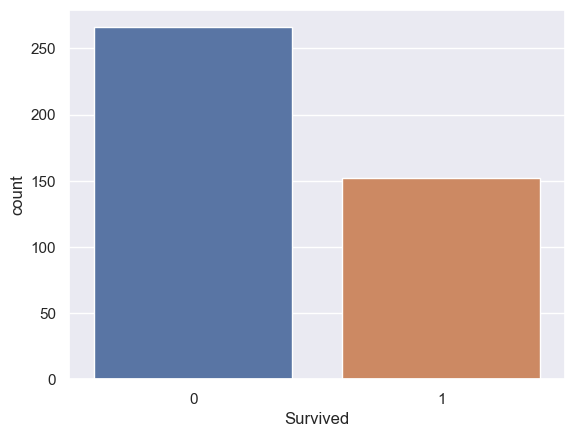

In [16]:
sns.countplot(x='Survived', data = titanic)

<Axes: xlabel='Sex', ylabel='count'>

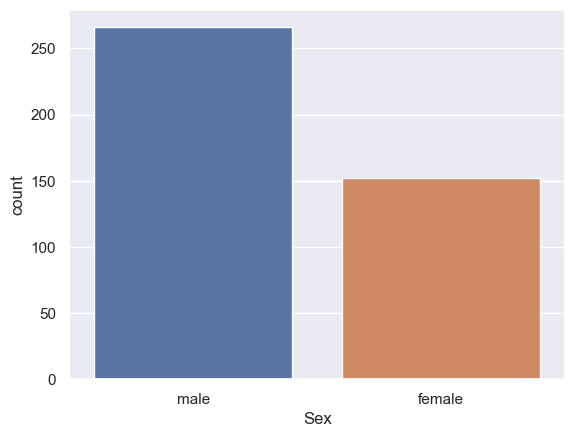

In [17]:
sns.countplot(x='Sex', data = titanic)

<Axes: xlabel='Pclass', ylabel='count'>

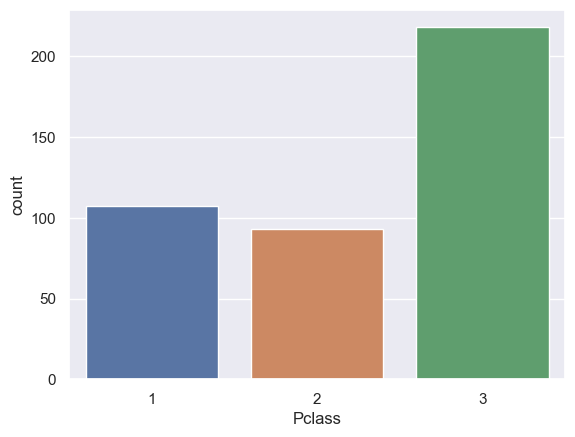

In [18]:
sns.countplot(x='Pclass', data = titanic)

<Axes: xlabel='Age', ylabel='Count'>

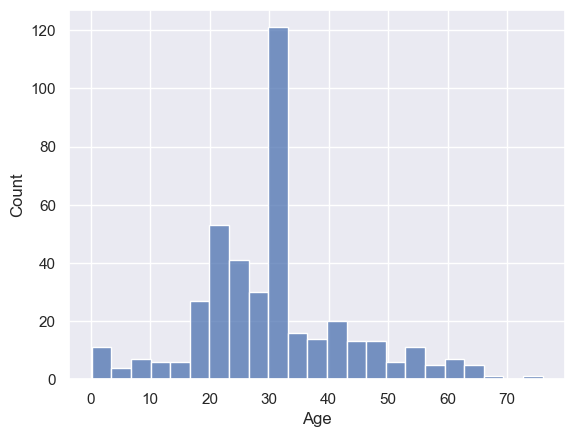

In [19]:
sns.histplot(x='Age', data = titanic)

<Axes: xlabel='SibSp', ylabel='count'>

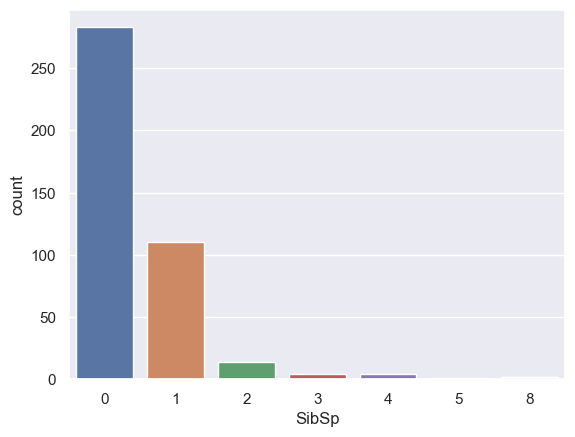

In [20]:
sns.countplot(x='SibSp', data= titanic)

<Axes: xlabel='Parch', ylabel='count'>

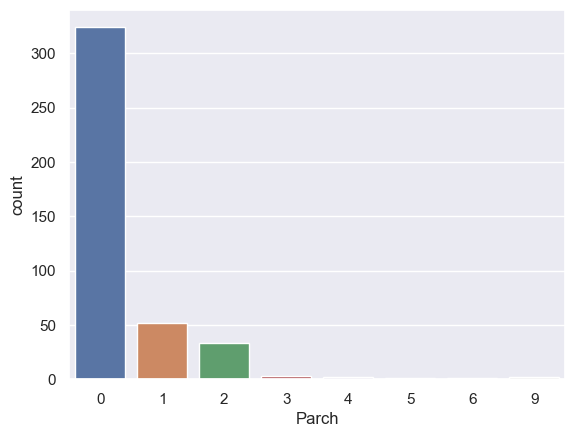

In [21]:
sns.countplot(x='Parch', data= titanic)

<Axes: xlabel='Sex', ylabel='count'>

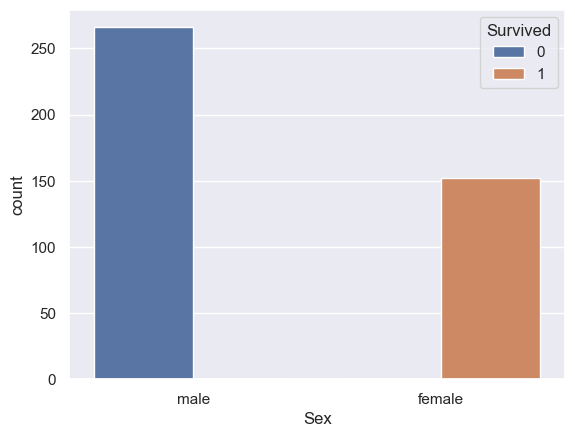

In [22]:
sns.countplot(x='Sex', hue='Survived', data = titanic)

We can infer from the above graph that no male survived and all females survived

<Axes: xlabel='Survived', ylabel='count'>

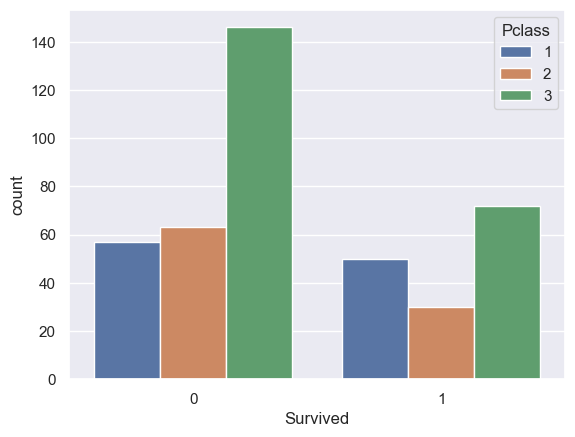

In [23]:
sns.countplot(x='Survived', hue='Pclass', data=titanic)

<Axes: xlabel='Sex', ylabel='count'>

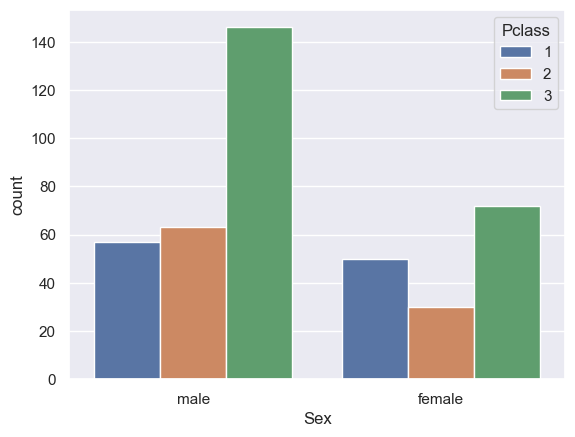

In [24]:
sns.countplot(x='Sex', hue='Pclass', data=titanic)

<Axes: xlabel='Age', ylabel='Count'>

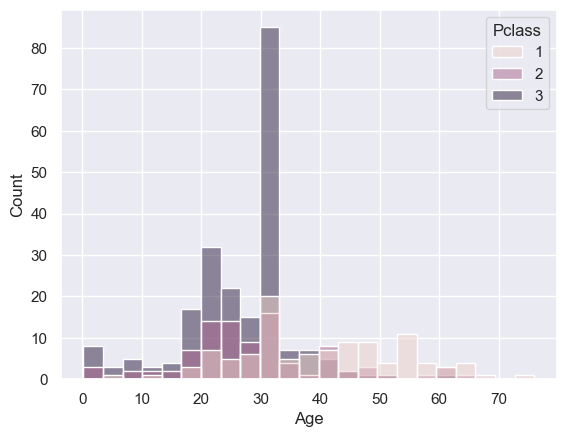

In [25]:
sns.histplot(x='Age', hue='Pclass', data = titanic)

<Axes: xlabel='Embarked', ylabel='count'>

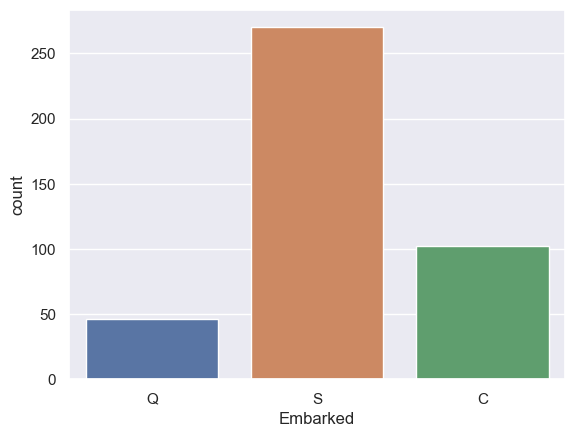

In [26]:
sns.countplot(x='Embarked', data = titanic)

<Axes: xlabel='Sex', ylabel='count'>

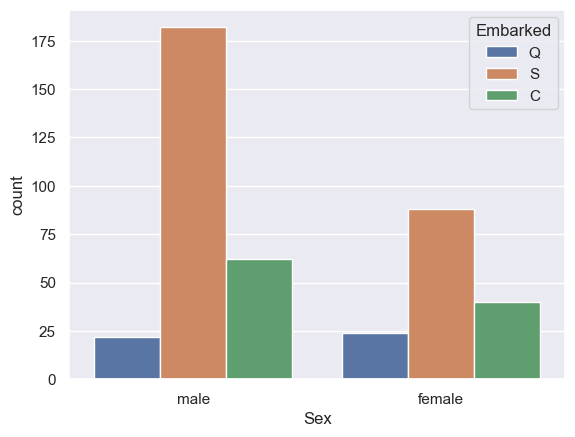

In [27]:
sns.countplot(x='Sex', hue= 'Embarked', data = titanic)

<Axes: xlabel='SibSp', ylabel='Parch'>

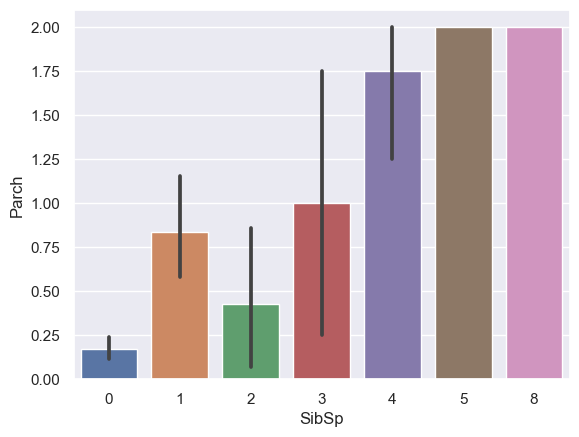

In [28]:
sns.barplot(x='SibSp', y='Parch', data= titanic)

### 4. Encoding the categorical columns (Sex, Embarked) to numerical column

In [29]:
titanic['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

In [30]:
titanic['Embarked'].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

First we'll replace all values as 'male' in Sex column by 0 and all values as 'female' by 1.

In [31]:
titanic.replace({'Sex':{'male':0, 'female':1 }, 'Embarked':{'C': 0, 'Q':1, 'S':2 }}, inplace = True)

In [32]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,2
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,1
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,2
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,2


In [33]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
413,1305,0,3,"Spector, Mr. Woolf",0,30.27259,0,0,A.5. 3236,8.0500,2
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",1,39.00000,0,0,PC 17758,108.9000,0
415,1307,0,3,"Saether, Mr. Simon Sivertsen",0,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,2
416,1308,0,3,"Ware, Mr. Frederick",0,30.27259,0,0,359309,8.0500,2
417,1309,0,3,"Peter, Master. Michael J",0,30.27259,1,1,2668,22.3583,0


# 5. Split Dataset into Training and Test Dataset

For this we use the train_test_split function from Sci-Kit Learn Library

In [34]:
X = titanic.drop(columns=['PassengerId','Name','Ticket','Survived'], axis=1)
Y= titanic['Survived']

In [35]:
print(X)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    0  34.50000      0      0    7.8292         1
1         3    1  47.00000      1      0    7.0000         2
2         2    0  62.00000      0      0    9.6875         1
3         3    0  27.00000      0      0    8.6625         2
4         3    1  22.00000      1      1   12.2875         2
..      ...  ...       ...    ...    ...       ...       ...
413       3    0  30.27259      0      0    8.0500         2
414       1    1  39.00000      0      0  108.9000         0
415       3    0  38.50000      0      0    7.2500         2
416       3    0  30.27259      0      0    8.0500         2
417       3    0  30.27259      1      1   22.3583         0

[418 rows x 7 columns]


In [36]:
print(Y)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


We consider 80% of data for training and 20% of data for testing. Therefore, test size=0.2

In [37]:
X_train , X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=1)

In [38]:
print(X.shape, X_train.shape, X_test.shape)

(418, 7) (334, 7) (84, 7)


In [39]:
print(Y.shape, Y_train.shape, Y_test.shape)

(418,) (334,) (84,)


# 6. Model Training

Implementation of Logistic Regression Model

In [40]:
log_model = LogisticRegression()

In [41]:
log_model.fit(X_train, Y_train)

d:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# 7. Model Evaluation and Prediction

In [42]:
#Accuracy on training data
X_train_predict = log_model.predict(X_train)
print(X_train_predict)

[0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1
 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 1
 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 1
 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0
 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1
 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 1]


In [43]:
train_accuracy = accuracy_score(Y_train, X_train_predict)
print(train_accuracy)

1.0


In [44]:
#Prediction on Testing data
test_predict = log_model.predict(X_test)
print(test_predict)

[0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0
 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1
 1 1 0 1 0 0 0 0 0 0]


In [45]:
test_accuracy= accuracy_score(Y_test, test_predict)
print(test_accuracy)

1.0


So, we concluded that our model has 100% accuracy.